Project Description
Using the AAPL (Apple Inc.) stock dataset, conduct the following analyses:



Initial Data Exploration
Load the dataset using Pandas. Check for null values and understand data types.
Examine the time series properties of the data (e.g., frequency, trends).


Data Visualization
Utilize Matplotlib to plot closing prices and traded volume over time.
Create a candlestick chart to depict high and low prices.


Statistical Analysis
Compute summary statistics (mean, median, standard deviation) for key columns.
Analyze closing prices with a moving average.


Hypothesis Testing
Execute a t-test to compare average closing prices across different years.
Examine daily returns’ distribution and test for normality using SciPy.


Advanced Statistical Techniques (Bonus)
Statistical Functions in NumPy: Employ NumPy’s statistical functions for in-depth stock data analysis.
E.g., Use convolve for moving averages, or np.corrcoef to explore correlations between financial metrics.
Analyze correlations between moving averages of closing prices and trading volume across time periods.


Resources
Dataset: download it here : AAPL Stock Data (2007-2023)

Includes daily data like volume, VWAP, open, close, high, low prices, and number of transactions.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('/content/AAPL, 1D 01012007-12072023.csv')
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [12]:
df.info()
df.duplicated().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


,volume,vwap,open,close,high,low,time,transactions
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4.159000e+03,4.159000e+03
mean,3.662925e+08,46.391382,46.362788,46.396058,46.881127,45.865790,1.428315e+09,2.709318e+05
std,3.724793e+08,50.277557,50.235593,50.293482,50.843874,49.680104,1.505279e+08,2.510859e+05
min,2.422234e+07,2.841000,2.835400,2.792900,2.928600,2.792900,1.167800e+09,3.048700e+04
25%,1.067497e+08,11.936200,11.955700,11.947150,12.028400,11.853600,1.297876e+09,1.128150e+05
50%,2.136463e+08,25.885200,25.775000,25.825000,26.262800,25.680000,1.428466e+09,1.782460e+05
75%,4.965321e+08,52.154150,52.263750,52.231250,52.626250,51.796250,1.558627e+09,3.259555e+05
max,3.373042e+09,193.102000,193.780000,193.970000,194.480000,191.760000,1.689134e+09,2.966979e+06


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=np.number).columns
df_normalised = scaler.fit_transform(df[numeric_cols])
df_normalised = pd.DataFrame(df_normalised, columns=numeric_cols)
df_normalised.head()

,volume,vwap,open,close,high,low,time,transactions
0,0.364672,0.000994,0.001292,0.001046,0.000854,0.000699,0.000000,0.054231
1,0.248225,0.001048,0.000871,0.001393,0.000736,0.001062,0.000166,0.036045
2,0.242186,0.001060,0.001193,0.001279,0.000783,0.001172,0.000331,0.037651
3,0.230885,0.001195,0.001229,0.001358,0.000845,0.001338,0.000829,0.034075
4,0.993719,0.001858,0.001320,0.002684,0.002047,0.001313,0.000994,0.183583


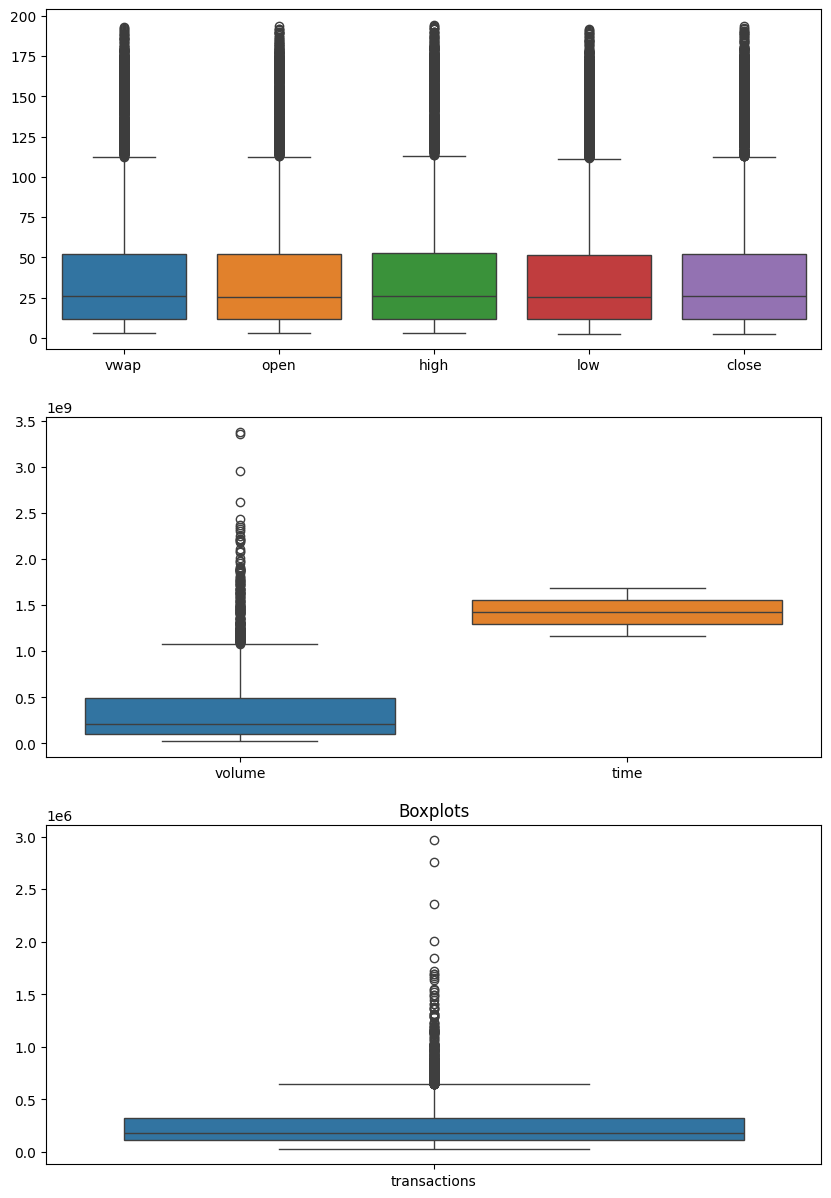

In [14]:
fig, axis = plt.subplots(3, 1, figsize=(10, 15))
sns.boxplot(data=df[['vwap','open', 'high', 'low', 'close']], ax=axis[0])
sns.boxplot(data=df[['volume', 'time']], ax=axis[1])
sns.boxplot(data=df[['transactions']], ax=axis[2])
plt.title('Boxplots')
plt.show()

overall multiple outliers, also almost whole dataset aside from time skewed positively skewed.

In [6]:
# def detect_outliers_iqr(data, column):
#     Q1 = data[column].quantile(0.25)
#     Q3 = data[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 3 * IQR
#     upper_bound = Q3 + 3 * IQR
#     return data[(data[column] < lower_bound) | (data[column] > upper_bound)]
# for col in ['volume', 'vwap', 'open', 'close', 'high', 'low', 'transactions']:
#     outliers = detect_outliers_iqr(df, col)
#     print(f'{col}: {len(outliers)} outliers')

# # used 3 instead of 1.5 as it was producing too many outliers, approx 18% of total data for few columns

# Decided to keep outliers cause they seem to not be an issue here while handling them is

volume: 54 outliers
vwap: 77 outliers
open: 65 outliers
close: 73 outliers
high: 73 outliers
low: 72 outliers
transactions: 94 outliers


Examine the time series properties of the data (e.g., frequency, trends).

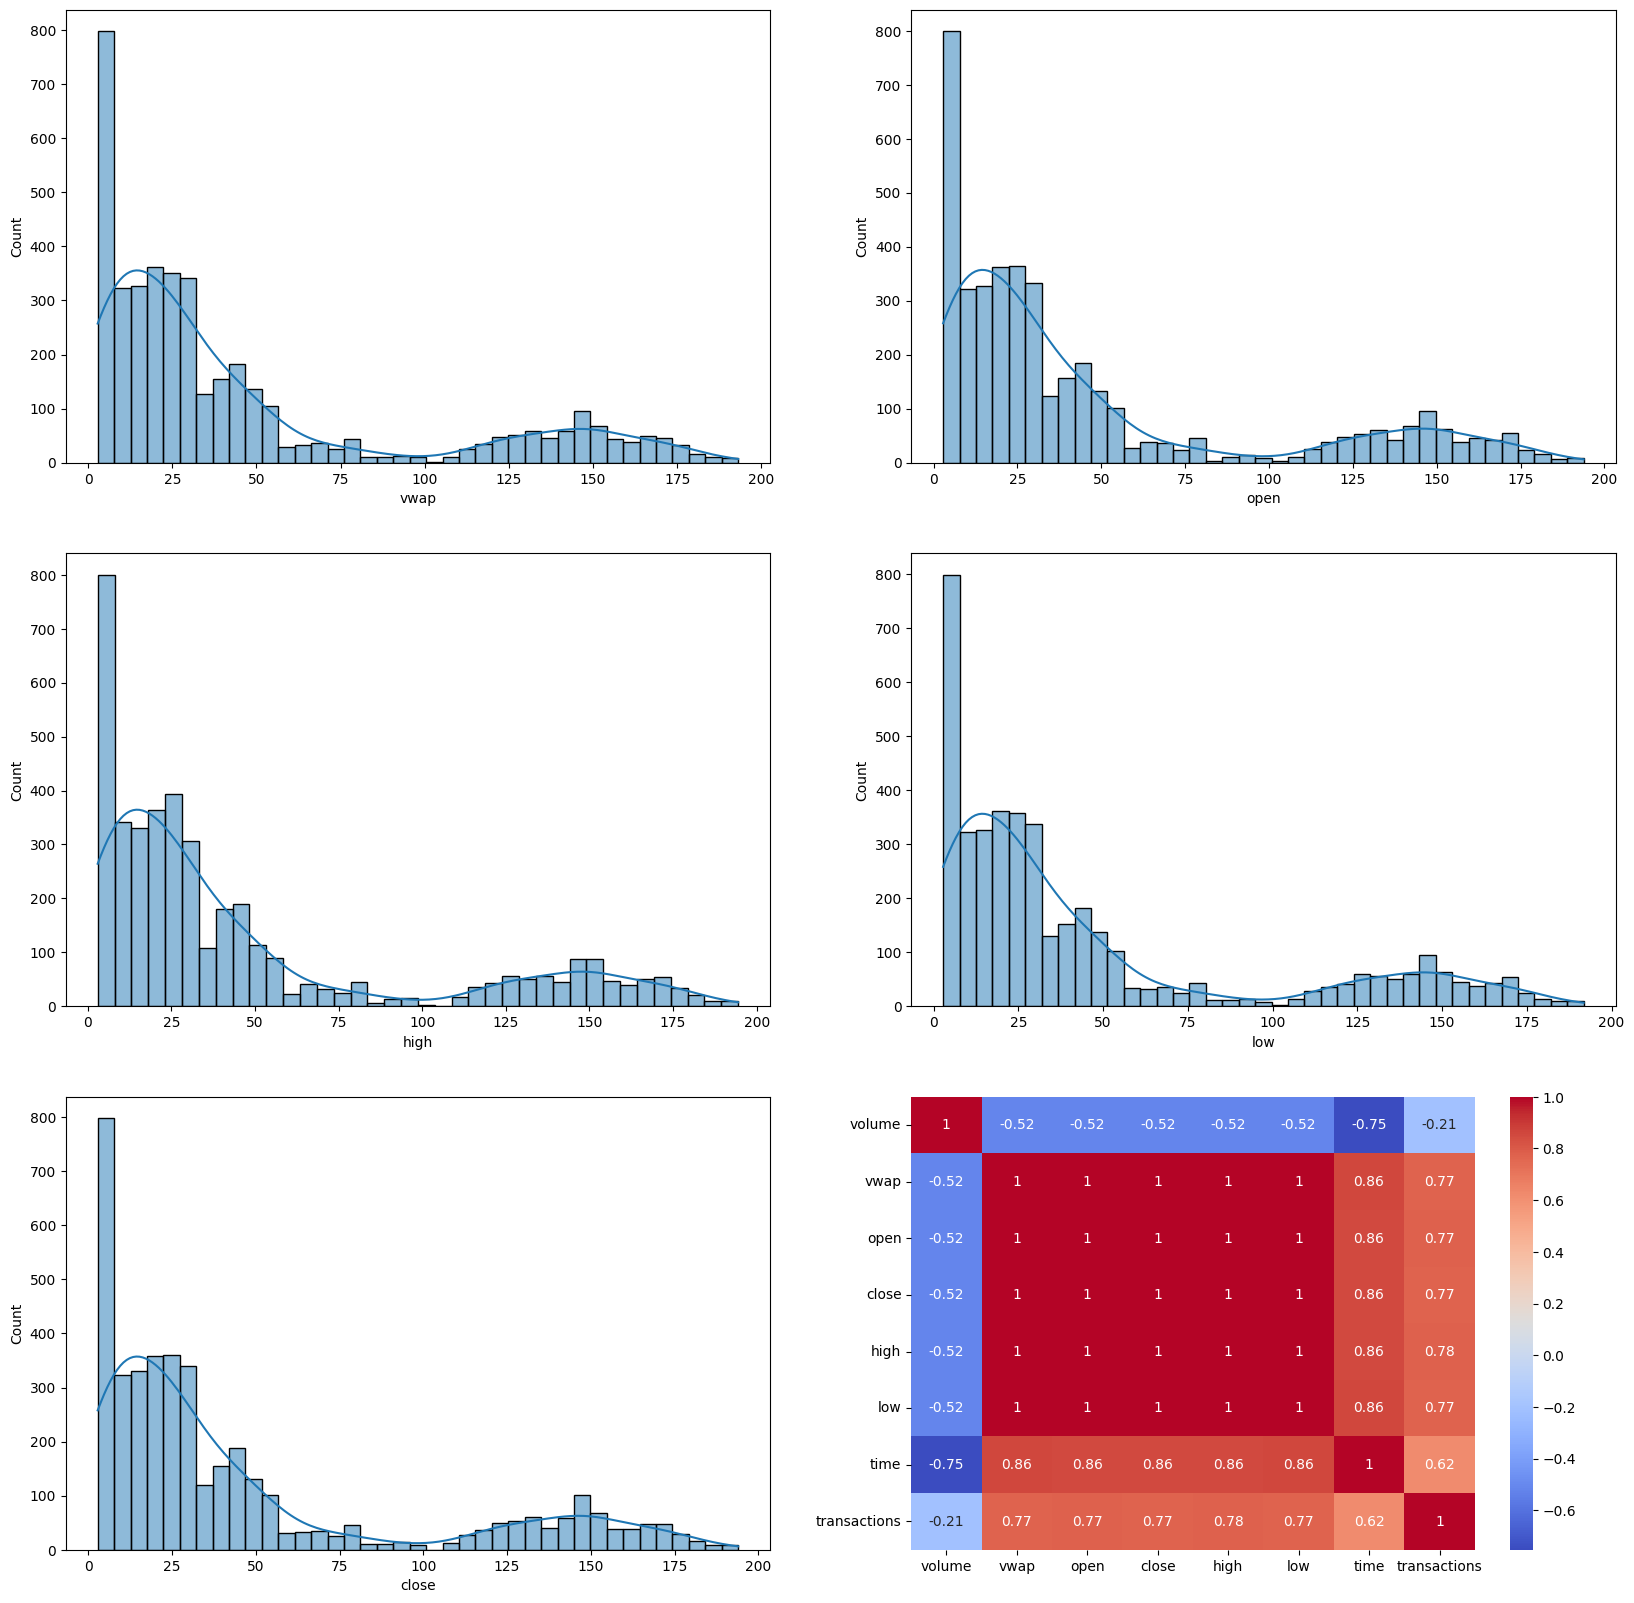

In [15]:
fig, axis = plt.subplots(3, 2, figsize=(20, 20))
sns.histplot(df['vwap'], kde=True, ax=axis[0, 0])
sns.histplot(df['open'], kde=True, ax=axis[0, 1])
sns.histplot(df['high'], kde=True, ax=axis[1, 0])
sns.histplot(df['low'], kde=True, ax=axis[1, 1])
sns.histplot(df['close'], kde=True, ax=axis[2, 0])
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axis[2, 1])
plt.show()

vwap, open, close, high and low are all positively correlated to each other i.e when one grows the other grows too.  Also we can see that time has also high positive corellation with these values which means that values grow with time, for the conclusion of positive corellation we should also note that transactions have high positive corellation with all values including time. Volume being an exception and has negative high corellation with all values.
Aside from positive skewness that we saw already with box charts we can also see that despite trend to lower frequency with higher value we can note a change in behaviour between 100 and 150 where it rises.


Data Visualization
Utilize Matplotlib to plot closing prices and traded volume over time.
Create a candlestick chart to depict high and low prices.

Text(0.5, 1.0, 'Traded Volume Over Time')

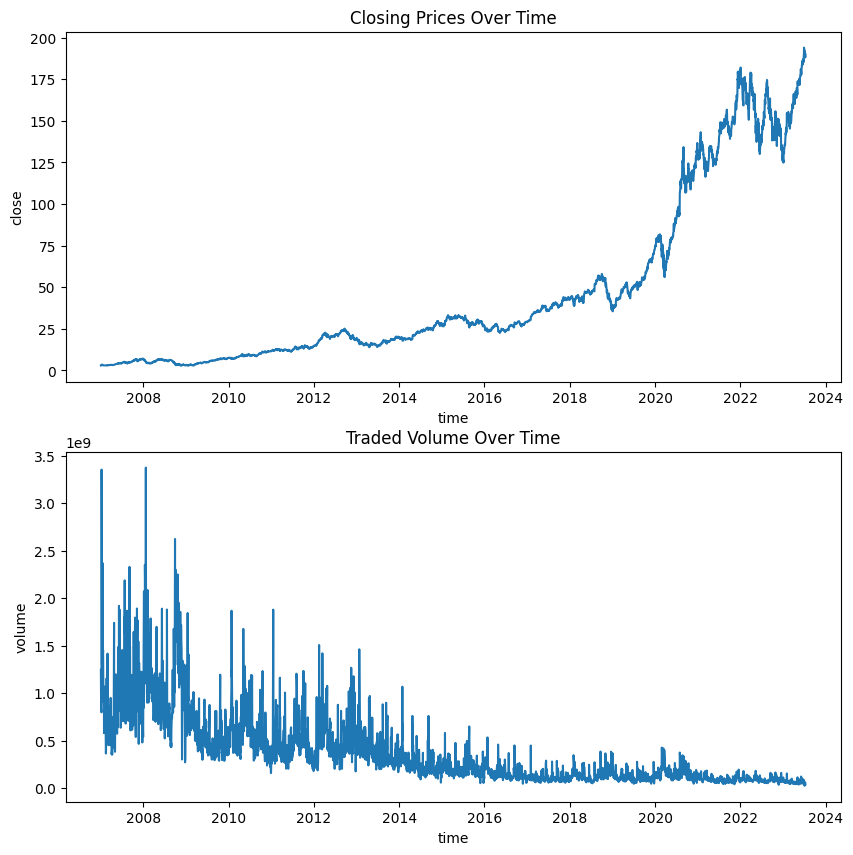

In [16]:
fig, axis = plt.subplots(2, 1, figsize=(10, 10))
df['time'] = pd.to_datetime(df['time'], unit='s')
df['year'] = df['time'].dt.year
sns.lineplot(data=df, x='time', y='close', ax=axis[0])
axis[0].set_title('Closing Prices Over Time')
sns.lineplot(data=df, x='time', y='volume', ax=axis[1])
plt.title('Traded Volume Over Time')

closing price as was stated previously grows over time, while volume decreases. We can note a relatively high grow on 2020-2021 points of time in closing prices and less stable change in prices after 2021 point than it was prior to 2020. Opposite applies to volume, that was higly unstable prior to 2015 and stabilized around 2020

In [17]:
import plotly.graph_objects as go
df_canndle = df.copy()
df_canndle['time'] = pd.to_datetime(df_canndle['time'], unit='s')

fig = go.Figure(data=[go.Candlestick(
    x=df_canndle['time'],
    open=df_canndle['open'],
    high=df_canndle['high'],
    low=df_canndle['low'],
    close=df_canndle['close']
)])
fig.update_layout(
    title='Candlestick Chart of High and Low Prices',
    xaxis_title='Time',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True
)
fig.show()

As we saw same tendency with just closing prices, prices overall were stable prior to 2020, when they firstly gained significant rise and after 2022 showed "jumping" tendencies

Statistical Analysis
Compute summary statistics (mean, median, standard deviation) for key columns.
Analyze closing prices with a moving average.

In [27]:
summary_stats = df[['volume', 'vwap', 'open', 'close', 'high', 'low']].agg(['mean', 'median', 'std'])

print("Summary Statistics:")
print(summary_stats)

df['moving_avg_close'] = df['close'].rolling(window=30).mean()

print("\nDataFrame with Moving Average for Closing Prices:")
print(df[['time', 'close', 'moving_avg_close']])

Summary Statistics:
              volume       vwap       open      close       high        low
mean    3.662925e+08  46.391382  46.362788  46.396058  46.881127  45.865790
median  2.136463e+08  25.885200  25.775000  25.825000  26.262800  25.680000
std     3.724793e+08  50.277557  50.235593  50.293482  50.843874  49.680104

DataFrame with Moving Average for Closing Prices:
                    time     close  moving_avg_close
0    2007-01-03 05:00:00    2.9929               NaN
1    2007-01-04 05:00:00    3.0593               NaN
2    2007-01-05 05:00:00    3.0375               NaN
3    2007-01-08 05:00:00    3.0525               NaN
4    2007-01-09 05:00:00    3.3061               NaN
...                  ...       ...               ...
4154 2023-07-06 04:00:00  191.8100        183.049333
4155 2023-07-07 04:00:00  190.6800        183.686667
4156 2023-07-10 04:00:00  188.6100        184.245667
4157 2023-07-11 04:00:00  188.0800        184.748667
4158 2023-07-12 04:00:00  190.0099        

Hypothesis Testing
Execute a t-test to compare average closing prices across different years.
Examine daily returns’ distribution and test for normality using SciPy.


In [28]:
df_log1p = df.copy()
columns_to_transform = ['volume', 'vwap', 'open', 'close', 'high', 'low']

for col in columns_to_transform:
    df_log1p[col] = np.log1p(df_log1p[col])

In [14]:
# df_sqrt = df.copy()
# columns_to_transform = ['volume', 'vwap', 'open', 'close', 'high', 'low']
# for col in columns_to_transform:
#     if (df_sqrt[col] >= 0).all():
#         df_sqrt[col] = np.sqrt(df_sqrt[col])
#     else:
#         print(f"Column {col} has negative values; consider shifting it before applying sqrt.")

T-Test Results: t-statistic = -4.57, p-value = 0.000


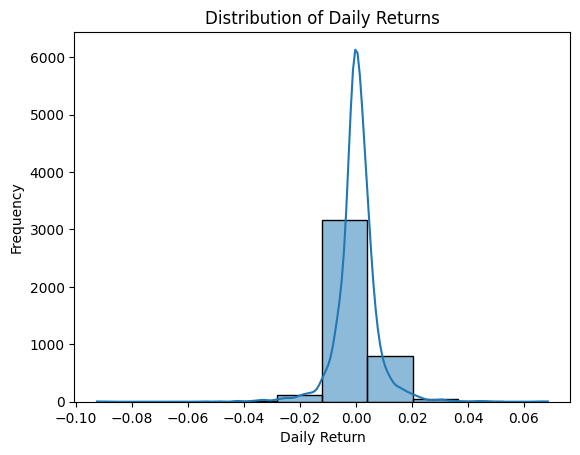

Shapiro-Wilk Test: statistic = 0.858, p-value = 0.000
Kolmogorov-Smirnov Test: statistic = 0.114, p-value = 0.000


In [29]:
from scipy.stats import ttest_ind, shapiro, kstest

years = df_log1p['year'].unique()
if len(years) > 1:
    year1_close = df_log1p[df_log1p['year'] == years[0]]['close']
    year2_close = df_log1p[df_log1p['year'] == years[1]]['close']
    t_stat, p_value = ttest_ind(year1_close, year2_close)
    print(f"T-Test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.3f}")
else:
    print("Insufficient data for a t-test across different years.")

df_log1p['daily_return'] = df_log1p['close'].pct_change()

sns.histplot(df_log1p['daily_return'].dropna(), kde=True, bins=10)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

daily_returns = df_log1p['daily_return'].dropna()

# shapiro-wilk test
shapiro_stat, shapiro_p = shapiro(daily_returns)
print(f"Shapiro-Wilk Test: statistic = {shapiro_stat:.3f}, p-value = {shapiro_p:.3f}")

# kolmogorov-smirnov test
ks_stat, ks_p = kstest(daily_returns, 'norm', args=(daily_returns.mean(), daily_returns.std()))
print(f"Kolmogorov-Smirnov Test: statistic = {ks_stat:.3f}, p-value = {ks_p:.3f}")

1.
as we can see close prices were higher in 2008 than in 2007 based on t-test.
2.
the distribution is tightly centered around 0.00, indicating small daily return fluctuations.
the shape seems symmetric but not normal bell-shaped.
3.
shapiro-wilk test: the low p-value < 0.05 indicates that the daily returns are not normally distributed
kolmogorov-smirnov test supports the results of shapiro-wilk test



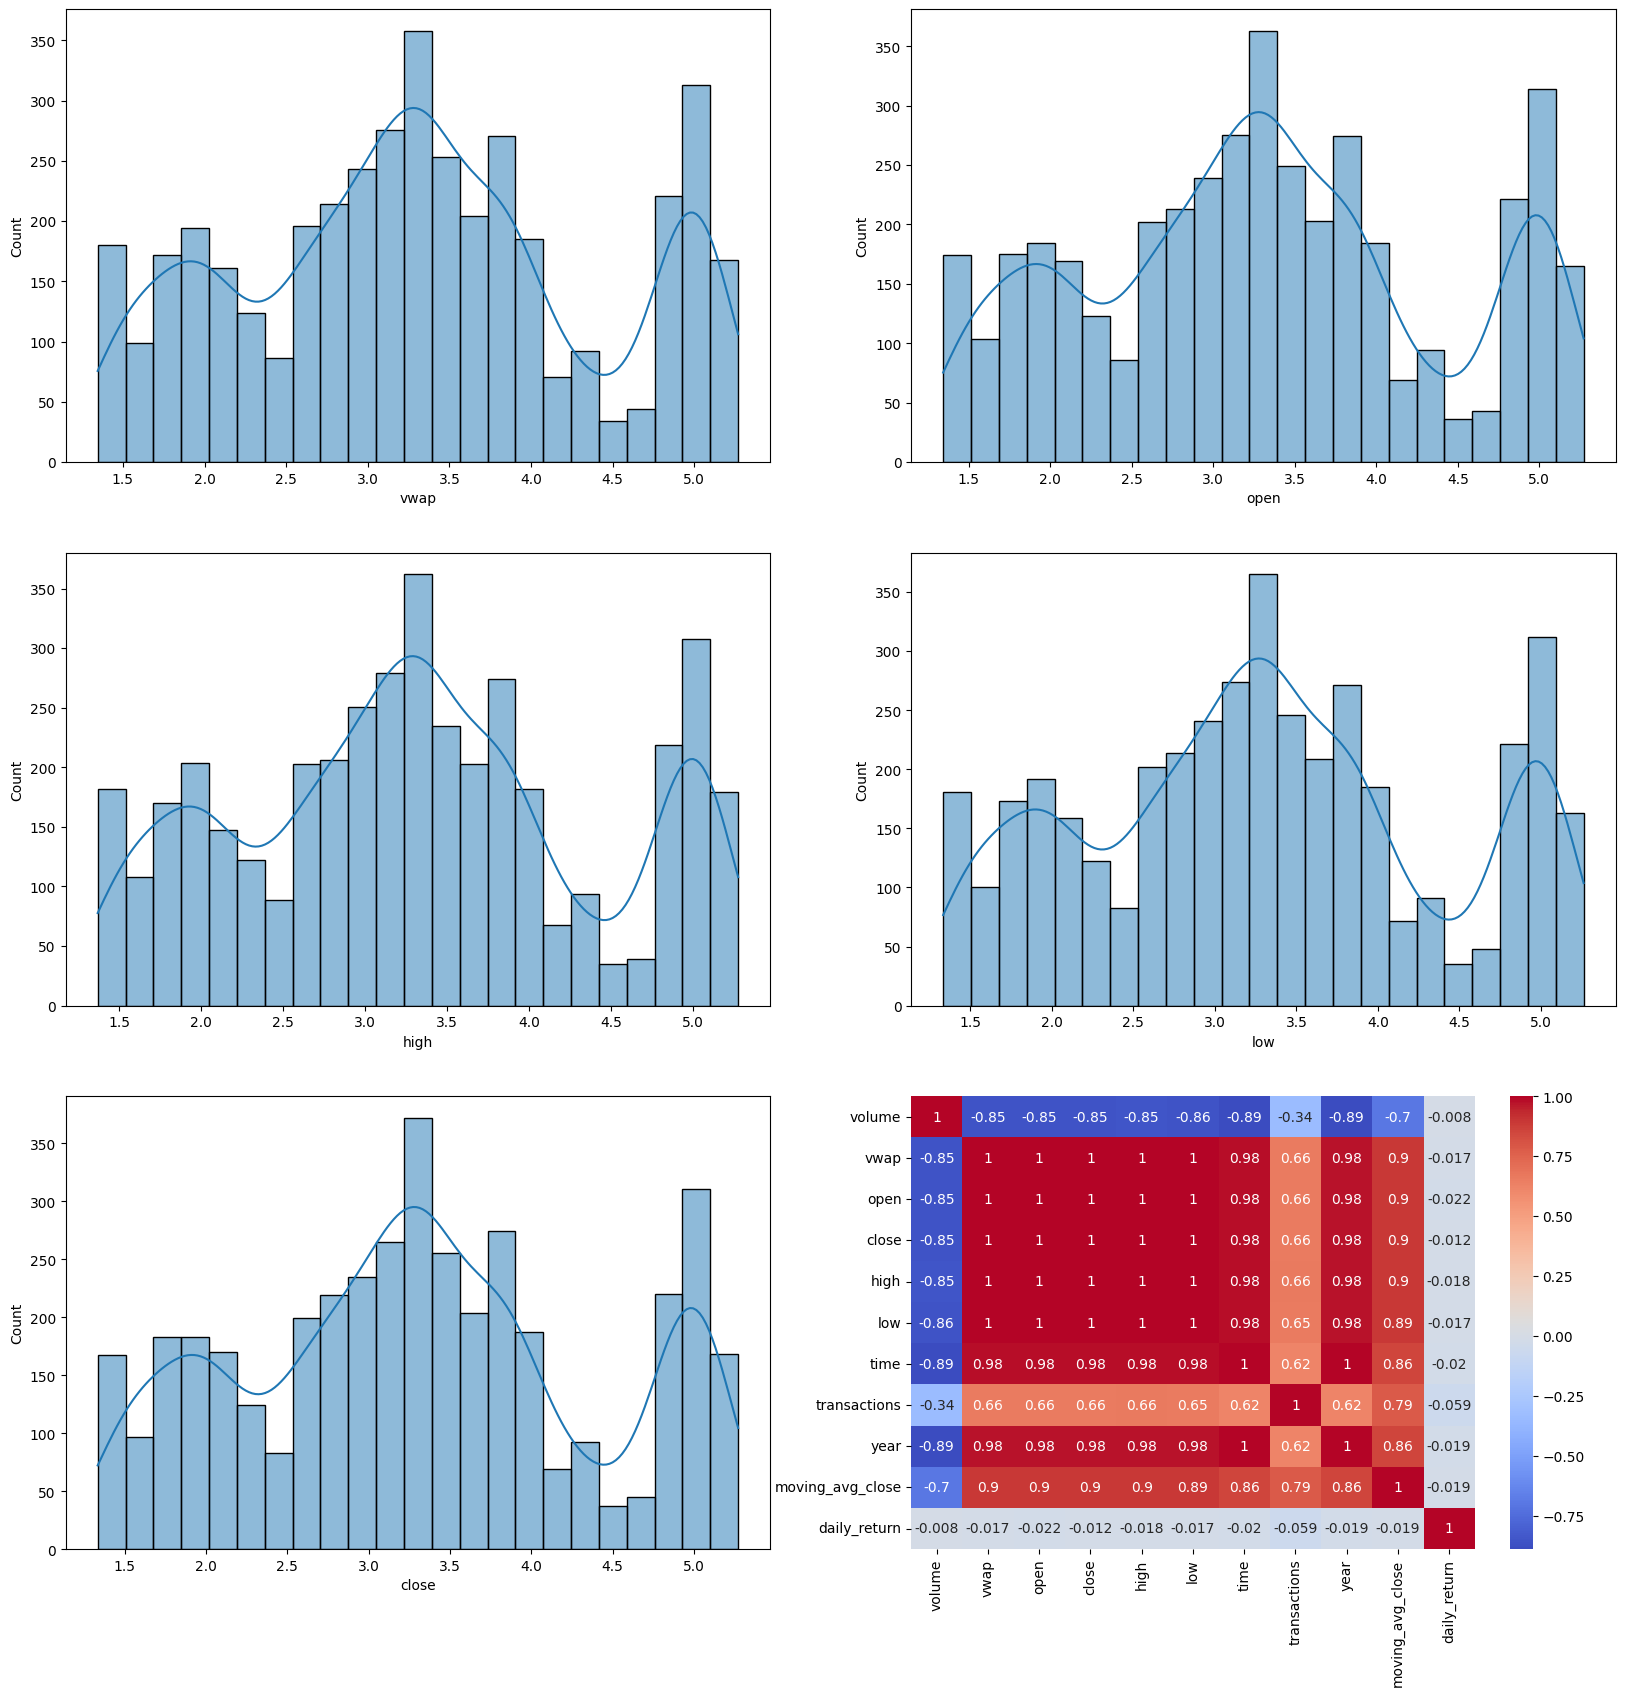

In [30]:
fig, axis = plt.subplots(3, 2, figsize=(20, 20))
sns.histplot(df_log1p['vwap'], kde=True, ax=axis[0, 0])
sns.histplot(df_log1p['open'], kde=True, ax=axis[0, 1])
sns.histplot(df_log1p['high'], kde=True, ax=axis[1, 0])
sns.histplot(df_log1p['low'], kde=True, ax=axis[1, 1])
sns.histplot(df_log1p['close'], kde=True, ax=axis[2, 0])
corr_matrix = df_log1p.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axis[2, 1])
plt.show()